### **Subject of this Python Script:  Sales Prediction**         
##### **Authored by: Taha Ehsan Ullah Butt**
Where to contact: tahapsycho07@gmail.com                    ||
**[Github Account](https://github.com/codebytaha/)**        ||
**[Linkedin Account](https://www.linkedin.com/in/taha-the-data-analyst/)**


-----

#### **Table Of Content:**
* [1. Importing Libraries](#1--import-the-libraries)
* [2. Data Exploration](#2--exploring-the-dataset)
* [3. Data Visualization](#3--data-visualization)
* [4. Model Building](#4--model-building)
     * [4.1. Simple Linear Regression](#41--simple-linear-regression)
     * [4.2. Building Linear Model](#42--buidling-a-linear-model)
     * [4.3. Model Evaluation](#43--model-evaluation)
         * [4.3.1. Residual Analysis](#431--residual-analysis) 
     * [4.4. Final Prediction on Dataset](#44--predictions-on-the-test-set)
* [5. Conclusion](#5--conclusion)


## _**1- Import the libraries**_   - 
###### [Go to Table of Content](#Table-Of-Content)

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

## _**2- Exploring the dataset**_  - 
###### [Go to Table of Content](#Table-Of-Content)


In [2]:
df = pd.read_csv('dataset/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.describe()   # statistical summary of dataframe

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info() # description of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()       # checking if any null values in a dataframe 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.shape

(200, 4)

## _**3- Data Visualization**_  - 
###### [Go to Table of Content](#Table-Of-Content)

<Axes: >

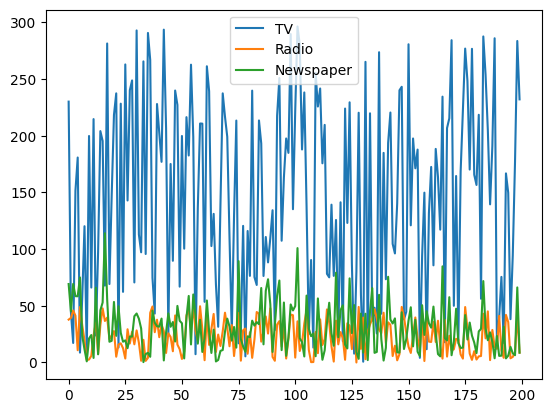

In [6]:
#plt.figure(figsize=(10, 10))
df[['TV', 'Radio', 'Newspaper']].plot()


##### _The plot indicates that the 'TV' feature has a higher count than 'Radio' and 'Newspaper' features._


<Axes: >

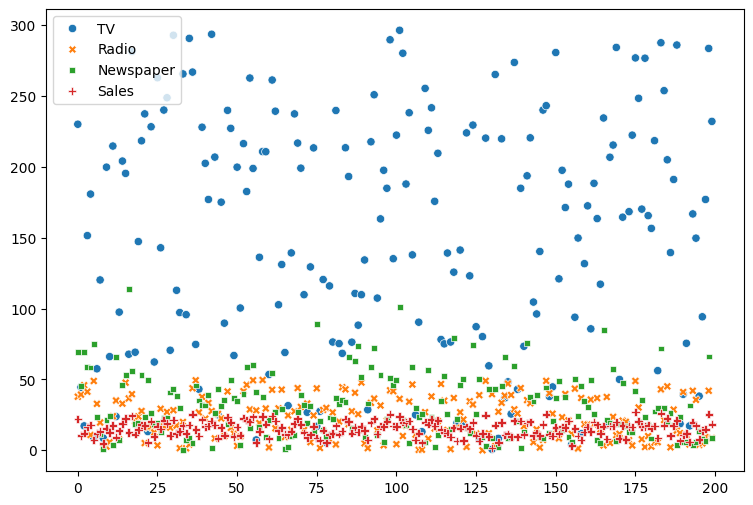

In [7]:
# scatterplot shows the dataframe in other dimensions
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df)

Text(0.5, 1.0, 'Relationship between TV and Sales')

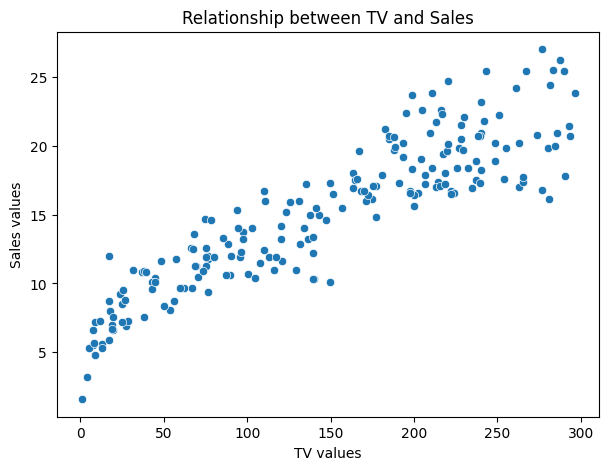

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'TV', y = 'Sales', data=df )
plt.xlabel('TV values')
plt.ylabel('Sales values')
plt.title('Relationship between TV and Sales')

Text(0.5, 1.0, 'Relationship between Radio and Sales')

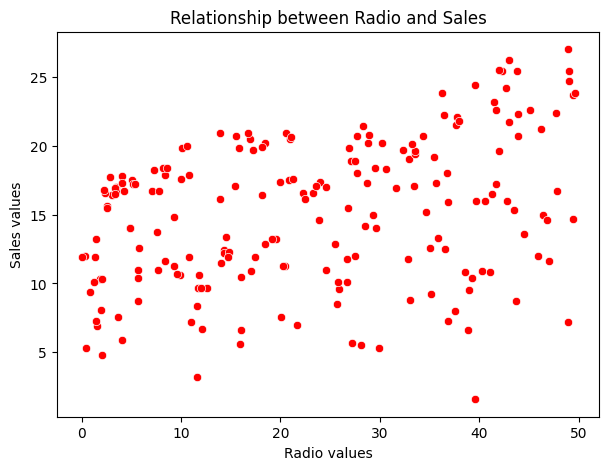

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Radio', y = 'Sales', data=df , color= 'red')
plt.xlabel('Radio values')
plt.ylabel('Sales values')
plt.title('Relationship between Radio and Sales')

Text(0.5, 1.0, 'Relationship between Newspaper and Sales')

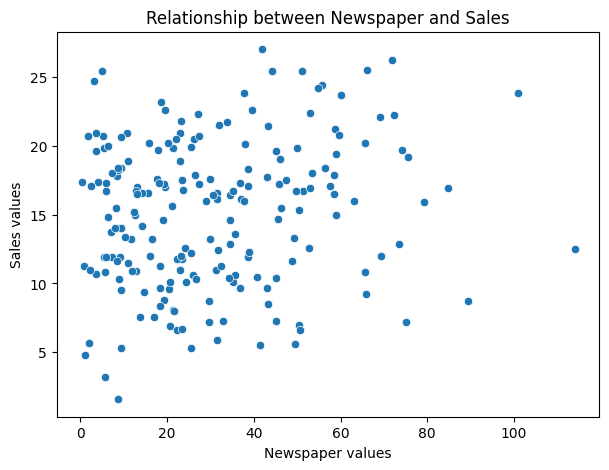

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Newspaper', y = 'Sales', data=df )
plt.xlabel('Newspaper values')
plt.ylabel('Sales values')
plt.title('Relationship between Newspaper and Sales')

---

##### _**3.1- Adding a best line fit**_

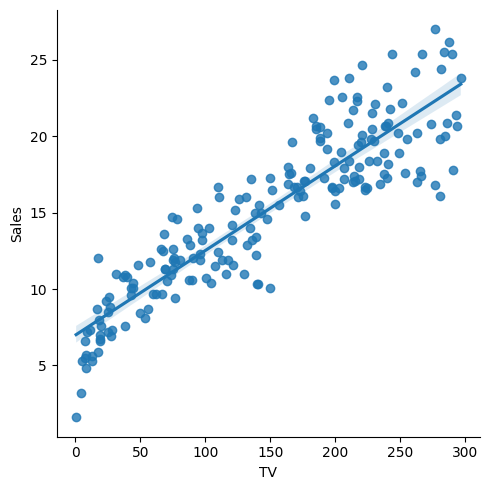

In [12]:
# Correlated plot shows that relationship between Tv and Sales
sns.lmplot(x = 'TV', y = 'Sales', data=df)

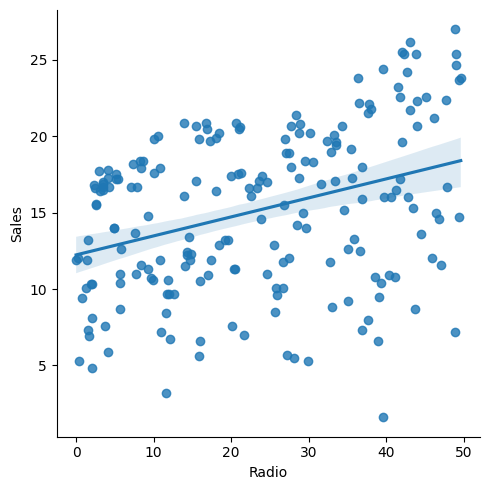

In [13]:
sns.lmplot(x = 'Radio', y = 'Sales', data=df)

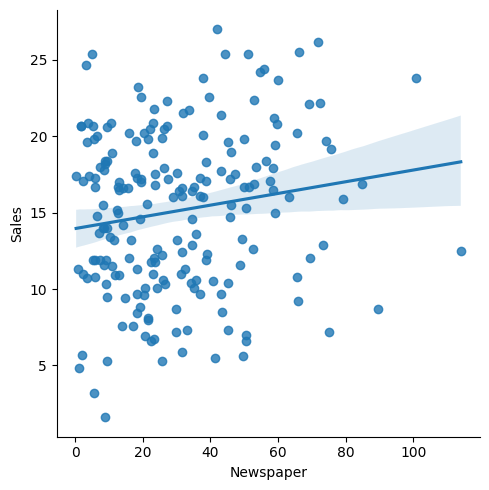

In [14]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data=df)

##### _**Above we created several plots to visualize the relationship between Sales and other features. The best fit line in these plots helps us understand the correlation between the variables.**_

In [15]:
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

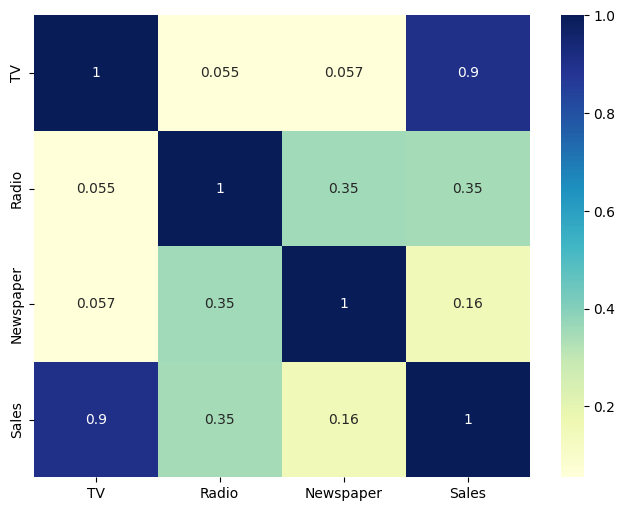

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")

Text(0.5, 1.0, 'Plot shows value of features')

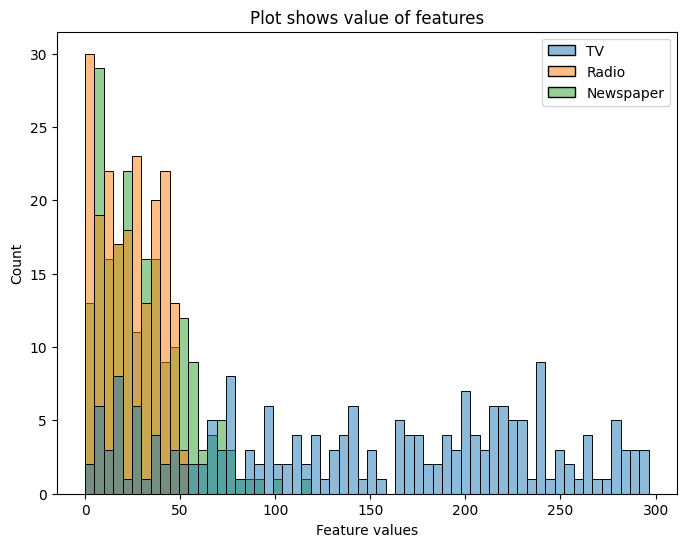

In [18]:
# Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(df[['TV', 'Radio', 'Newspaper']], bins=60)
plt.xlabel('Feature values')
plt.ylabel('Count')
plt.title('Plot shows value of features')

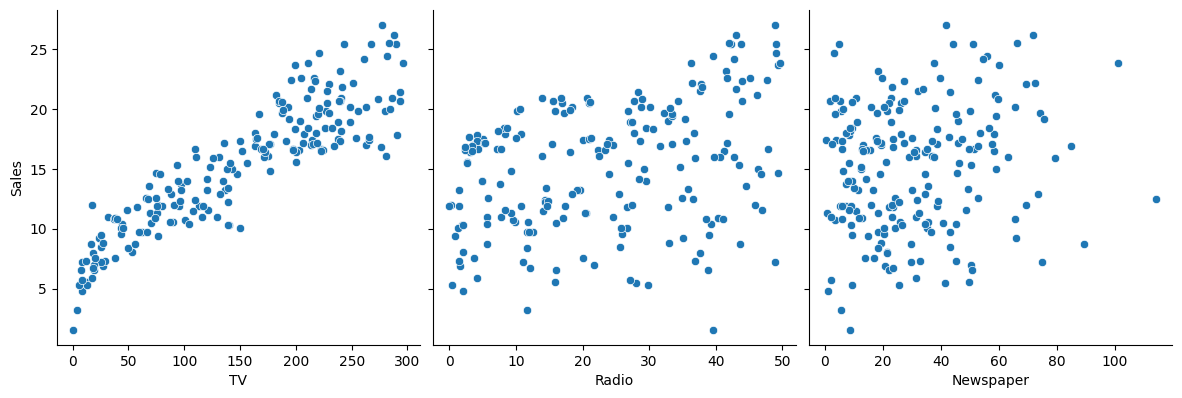

In [19]:
# Pairplot 
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter', height = 4, aspect= 1)
plt.show()

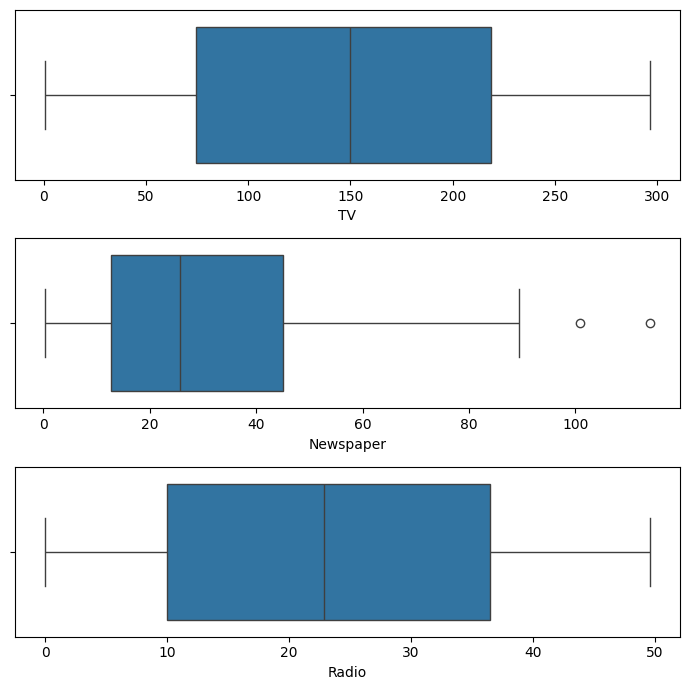

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (7,7))
plt1 = sns.boxplot(x = df['TV'], ax = axs[0])
plt2 = sns.boxplot(x = df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x = df['Radio'], ax = axs[2])
plt.tight_layout()

##### _**As we can see in Above plot there is no outliers in our dataset**_
----

## _**4- Model Building**_  - 
###### [Go to Table of Content](#Table-Of-Content)

-  We have implemented simple linear regression to estimate the relationship between quantitative variables.
-  The objective of this technique is to adjust the values of the model's parameters to find the line or curve that best fits the data.
-  By doing so, we can make predictions about the dependent variable based on the independent variable. 
-  In this case, we want to predict the Sales variable based on the TV, Radio, and Newspaper variables.


### _4.1- Simple Linear_  
###### [Go to Table of Content](#Table-Of-Content)

- Equation of linear regression

- y = c + m1x1 + m2x2 + ... + mnxn

- y is the response

- c is the intercept

- m1 is the coeffiecient value for the first feature

- mn is the coefficient value for the nth feature

- In our Case, the equation of linear regression will be:

- y = c + m1 * TV 

- where the m values are the model coefficients or model parameters.


In [21]:
x = df['TV']

In [22]:
y = df['Sales']

---

### Train and test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [24]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [28]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

---

### _4.2- Buidling a linear model_

In [25]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [26]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        14:56:06   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Some key statistics from the summary**

1. The coefficient for TV is 0.0545, with a very low p value

   The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816

   Meaning that 81.6% of the variance in Sales is explained by TV

   This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
  
   Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

From the parameters that we get, our linear regression equation becomes:

Sales = 6.9487 + 0.0545 * TV

---

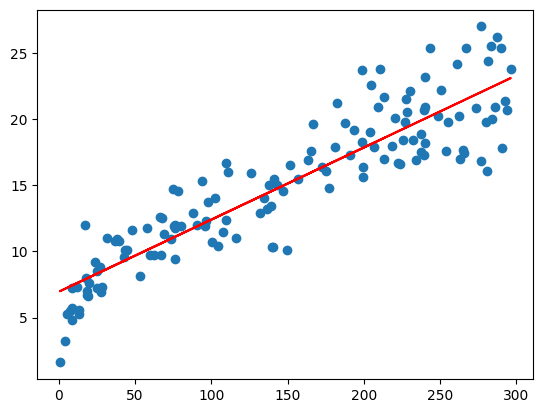

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train , 6.9487 + 0.0545 * X_train, 'r')
plt.show()

---

### _4.3- Model Evaluation_  
###### [Go to Table of Content](#Table-Of-Content)

#### 4.3.1- Residual Analysis   
###### [Go to Table of Content](#Table-Of-Content)

In [29]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [30]:
res = (y_train - y_train_pred)

In [31]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

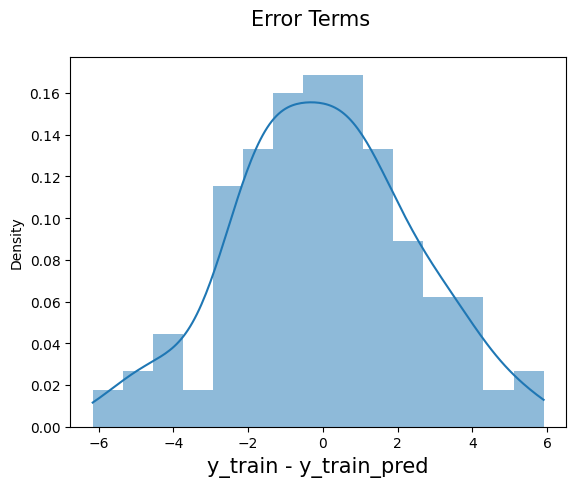

In [32]:
fig = plt.figure()
sns.histplot(res, bins = 15, kde=True, stat="density", linewidth=0)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

##### I have observed that the residuals are normally distributed with a mean of 0, which is a good sign. This indicates that the linear regression model is a good fit for the data.
---


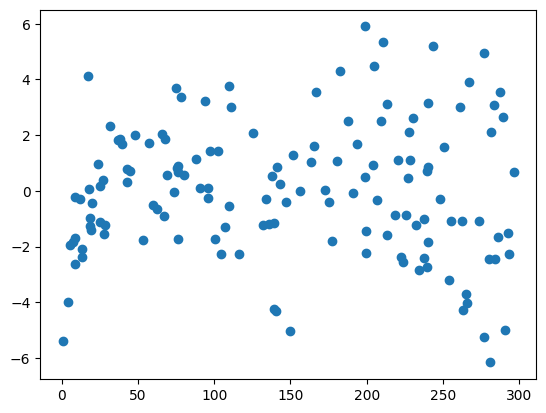

In [33]:
plt.scatter(X_train,res)
plt.show()

---

### _4.4- Predictions on the Test Set_  
###### [Go to Table of Content](#Table-Of-Content)

In [34]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [35]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [36]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [37]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

##### R² of 0.79 is generally a positive indicator of model's ability to explain the variability in the dependent variable

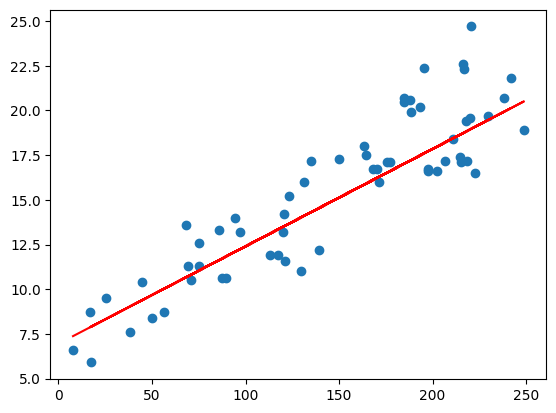

In [39]:
# Visualize the fit on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487 + 0.0545 * X_test, 'r')
plt.show()

----

## _**5. Conclusion**_
###### [Go to Table of Content](#Table-Of-Content)


- **The equation of best fitted line is:**
-  **Sales = 6.948 + 0.054*TV**
##### **The company should focus more on TV advertisement as compared to radio and newspaper for increasing the sales.**
##### **The company should also focus on increasing the sales in the New York city as it has the highest sales.**



                                        -----------------------------------